# 🧹 Cleaning and Merging Data for Elections Model


## 📦 Setting Up: Importing Libraries




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 📂 Loading and Exploring Datasets
- Load data for 2024, 2020, and historical polling.
- Perform basic inspections for structure and data types.


In [3]:
# Load the datasets
poll_files = {
    "2024": "dataset/polling_data_2024.csv",
    "2020": "dataset/polling_data_2020.csv",
    "1968-2016": "dataset/polling_data_1968-2016.csv",  # Historical polling data from 1968 to 2016
}

poll_data_24 = pd.read_csv(poll_files["2024"])  # Polling data for 2024
poll_data_20 = pd.read_csv(poll_files["2020"])  # Polling data for 2020
poll_data_pre_20 = pd.read_csv(poll_files["1968-2016"])  # Historical polling data

In [4]:
# Check data types for the 2024 polling dataset
poll_data_24.dtypes

,0
poll_id,int64
pollster_id,int64
pollster,object
sponsor_ids,object
sponsors,object
display_name,object
pollster_rating_id,int64
pollster_rating_name,object
numeric_grade,float64
pollscore,float64


In [5]:
# Preview the 'state' column from the 2024 polling dataset
poll_data_24['state']

,state
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
18090,NaN
18091,NaN
18092,NaN
18093,NaN


In [6]:
# Check data types for the 2020 polling dataset
poll_data_20.dtypes

,0
cycle,int64
state,object
modeldate,object
candidate_name,object
pct_estimate,float64
pct_trend_adjusted,float64


In [7]:
# Check data types for the historical polling dataset (1968-2016)
poll_data_pre_20.dtypes

,0
cycle,int64
state,object
modeldate,object
candidate_name,object
candidate_id,int64
pct_estimate,float64
pct_trend_adjusted,float64
timestamp,object
comment,object
election_date,object


In [8]:
# Define common features for concatenating polling averages
common_features = ['state', 'cycle', 'modeldate', 'candidate_name', 'pct_estimate']

In [9]:
# Add cycle column for 2024 data
poll_data_24['cycle'] = 2024

# Standardize column names to match common_features
poll_data_24.rename(columns={
    'end_date': 'modeldate',
    'pct': 'pct_estimate'
}, inplace=True)

# Retain only the common features
poll_data_24 = poll_data_24[common_features]

## 🔗 Combining Polling Datasets
- Merge polling data from different years into one DataFrame.

In [13]:
# Retain only the common features for the 2020 polling data
poll_data_20 = poll_data_20[common_features]

# Retain only the common features for the historical polling data (1968-2016)
poll_data_pre_20 = poll_data_pre_20[common_features]

# Combine all polling datasets into a single DataFrame
poll_data = pd.concat([poll_data_24, poll_data_20, poll_data_pre_20], ignore_index=True)

poll_data

,state,cycle,modeldate,candidate_name,pct_estimate
0,NaN,2024,11/4/24,Kamala Harris,48.10000
1,NaN,2024,11/4/24,Donald Trump,49.20000
2,NaN,2024,11/4/24,Jill Stein,1.10000
3,NaN,2024,11/4/24,Cornel West,0.30000
4,NaN,2024,11/4/24,Chase Oliver,0.10000
...,...,...,...,...,...
264648,National,1968,11/4/1968,"Hubert Humphrey, Jr.",39.06675
264649,National,1968,11/4/1968,Richard M. Nixon,47.72081
264650,National,1968,11/5/1968,George Wallace,15.00200
264651,National,1968,11/5/1968,"Hubert Humphrey, Jr.",39.06675


In [14]:
# Count rows with missing 'state' values in the combined dataset
len(poll_data[poll_data['state'].isna()])

8024

In [15]:
# Drop rows with missing 'state' values from the combined dataset
poll_data.dropna(subset=['state'], inplace=True)

## 🧹 Cleaning and Standardizing Poll Data
- Handle missing values and keep recent election cycles.
- Standardize date formats and retain relevant columns.

In [17]:
# Filter dataset to include only the last 5 election cycles (2004 and onwards)
poll_data = poll_data[poll_data['cycle'] >= 2004]

# Display the filtered polling dataset
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate
7,Arizona,2024,11/4/24,Kamala Harris,45.900000
8,Arizona,2024,11/4/24,Donald Trump,51.000000
9,Arizona,2024,11/4/24,Jill Stein,1.000000
10,Arizona,2024,11/4/24,Chase Oliver,0.400000
11,Arizona,2024,11/4/24,Kamala Harris,46.500000
...,...,...,...,...,...
144411,Vermont,2004,11/2/2004,John Kerry,49.357665
144412,Virginia,2004,11/2/2004,John Kerry,43.916727
144413,Washington,2004,11/2/2004,John Kerry,51.681792
144414,West Virginia,2004,11/2/2004,John Kerry,44.495975


In [21]:
# Convert 'modeldate' column to datetime format, handling errors
poll_data['modeldate'] = pd.to_datetime(poll_data['modeldate'], errors='coerce')

# Display the dataset after standardizing 'modeldate'
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate
7,Arizona,2024,2024-11-04,Kamala Harris,45.900000
8,Arizona,2024,2024-11-04,Donald Trump,51.000000
9,Arizona,2024,2024-11-04,Jill Stein,1.000000
10,Arizona,2024,2024-11-04,Chase Oliver,0.400000
11,Arizona,2024,2024-11-04,Kamala Harris,46.500000
...,...,...,...,...,...
144411,Vermont,2004,2004-11-02,John Kerry,49.357665
144412,Virginia,2004,2004-11-02,John Kerry,43.916727
144413,Washington,2004,2004-11-02,John Kerry,51.681792
144414,West Virginia,2004,2004-11-02,John Kerry,44.495975


## 🛠️ Feature Engineering: Adding Party Information
- Use candidate names to create a new column for political party.


In [22]:
# Get unique candidate names
candidate_names = poll_data['candidate_name'].unique().tolist()

# Map candidate names to their respective political parties
candidate_to_party = {
    "Kamala Harris": "DEM",
    "Donald Trump": "REP",
    "Jill Stein": "IND",
    "Cornel West": "IND",
    "Chase Oliver": "LIB",
    "Robert F. Kennedy": "IND",
    "Randall A. Terry": "IND",
    "Claudia De La Cruz": "IND",
    "Robert Wells": "IND",
    "Joel Skousen": "IND",
    "Peter Sonski": "IND",
    "Joseph Kishore": "IND",
    "JD Vance": "REP",
    "Christopher Garrity": "IND",
    "Shiva Ayyadurai": "IND",
    "Joe Biden": "DEM",
    "Gavin Newsom": "DEM",
    "Gretchen Whitmer": "DEM",
    "Josh Shapiro": "DEM",
    "Pete Buttigieg": "DEM",
    "Mark Kelly": "DEM",
    "Roy A. Cooper": "DEM",
    "Raphael Warnock": "DEM",
    "Michelle Obama": "DEM",
    "J.B. Pritzker": "DEM",
    "Bernie Sanders": "DEM",
    "Hillary Rodham Clinton": "DEM",
    "Al Gore": "DEM",
    "Elizabeth Ann Warren": "DEM",
    "Andy Beshear": "DEM",
    "Amy Klobuchar": "DEM",
    "Cory A. Booker": "DEM",
    "Lars Mapstead": "LIB",
    "Charles Ballay": "IND",
    "Taylor Swift": "IND",
    "Kanye West": "IND",
    "Joe Manchin, III": "DEM",
    "Nikki Haley": "REP",
    "Ron DeSantis": "REP",
    "Dean Phillips": "DEM",
    "Liz Cheney": "REP",
    "Mark Cuban": "IND",
    "Vivek G. Ramaswamy": "REP",
    "Mike Pence": "REP",
    "Mitt Romney": "REP",
    "Tim Scott": "REP",
    "Glenn Youngkin": "REP",
    "Chris Christie": "REP",
    "Larry Hogan": "REP",
    "Donald Trump Jr.": "REP",
    "Andy Cohen": "IND",
    "Chris Sununu": "REP",
    "Marco Rubio": "REP",
    "Ted Cruz": "REP",
    "Josh Hawley": "REP",
    "Tom Cotton": "REP",
    "Kristi Noem": "REP",
    "Rick Scott": "REP",
    "Mike Pompeo": "REP",
    "Jerome Michael Segal": "IND",
    "Andrew Yang": "IND",
    "Matthew David McConaughey": "IND",
    "Elon Reeve Musk": "IND",
    "Philip Murphy": "DEM",
    "Joseph R. Biden Jr.": "DEM",
    "Convention Bounce for Joseph R. Biden Jr.": "DEM",
    "Convention Bounce for Donald Trump": "REP",
    "Gary Johnson": "LIB",
    "Barack Obama": "DEM",
    "John McCain": "REP",
    "George W. Bush": "REP",
    "John Kerry": "DEM"
}

In [24]:
# Map candidate names to their respective parties and add as a new column
poll_data['party'] = poll_data['candidate_name'].apply(lambda x: candidate_to_party.get(x, "IND"))

# Display the dataset after adding the "Party" column
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate,party
7,Arizona,2024,2024-11-04,Kamala Harris,45.900000,DEM
8,Arizona,2024,2024-11-04,Donald Trump,51.000000,REP
9,Arizona,2024,2024-11-04,Jill Stein,1.000000,IND
10,Arizona,2024,2024-11-04,Chase Oliver,0.400000,LIB
11,Arizona,2024,2024-11-04,Kamala Harris,46.500000,DEM
...,...,...,...,...,...,...
144411,Vermont,2004,2004-11-02,John Kerry,49.357665,DEM
144412,Virginia,2004,2004-11-02,John Kerry,43.916727,DEM
144413,Washington,2004,2004-11-02,John Kerry,51.681792,DEM
144414,West Virginia,2004,2004-11-02,John Kerry,44.495975,DEM


In [25]:
# Map each election cycle to its corresponding election date
election_dates = {
    2004: pd.to_datetime('2004-11-02'),
    2008: pd.to_datetime('2008-11-04'),
    2012: pd.to_datetime('2012-11-06'),
    2016: pd.to_datetime('2016-11-08'),
    2020: pd.to_datetime('2020-11-03'),
    2024: pd.to_datetime('2024-11-05'),
}

# Add the mapped election dates as a new column
poll_data['election_date'] = poll_data['cycle'].map(election_dates)

In [27]:
# Calculate the number of days until the election for each poll
poll_data['days_until_election'] = (poll_data['election_date'] - poll_data['modeldate']).dt.days

# Display the dataset after adding the "days_until_election" feature
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election
7,Arizona,2024,2024-11-04,Kamala Harris,45.900000,DEM,2024-11-05,1
8,Arizona,2024,2024-11-04,Donald Trump,51.000000,REP,2024-11-05,1
9,Arizona,2024,2024-11-04,Jill Stein,1.000000,IND,2024-11-05,1
10,Arizona,2024,2024-11-04,Chase Oliver,0.400000,LIB,2024-11-05,1
11,Arizona,2024,2024-11-04,Kamala Harris,46.500000,DEM,2024-11-05,1
...,...,...,...,...,...,...,...,...
144411,Vermont,2004,2004-11-02,John Kerry,49.357665,DEM,2004-11-02,0
144412,Virginia,2004,2004-11-02,John Kerry,43.916727,DEM,2004-11-02,0
144413,Washington,2004,2004-11-02,John Kerry,51.681792,DEM,2004-11-02,0
144414,West Virginia,2004,2004-11-02,John Kerry,44.495975,DEM,2004-11-02,0


In [28]:
# Define static party lean information for states
swing_states = [
    'Pennsylvania', 'Wisconsin', 'Michigan', 'Georgia',
    'North Carolina', 'Arizona', 'Nevada'
]
blue_states = [
    'District of Columbia', 'Vermont', 'Massachusetts', 'Maryland',
    'Hawaii', 'California', 'ME-1', 'Connecticut', 'Washington',
    'Delaware', 'Rhode Island', 'New York', 'Illinois', 'New Jersey',
    'Oregon', 'Colorado', 'Maine', 'New Mexico', 'Virginia',
    'New Hampshire', 'NE-2', 'Minnesota'
]
red_states = [
    'Wyoming', 'West Virginia', 'Oklahoma', 'North Dakota', 'Idaho',
    'South Dakota', 'Arkansas', 'Kentucky', 'NE-3', 'Alabama',
    'Tennessee', 'Utah', 'Louisiana', 'Nebraska', 'Mississippi',
    'Montana', 'NE-1', 'Indiana', 'Kansas', 'Missouri',
    'South Carolina', 'Alaska', 'Ohio', 'Iowa', 'Texas',
    'ME-2', 'Florida'
]

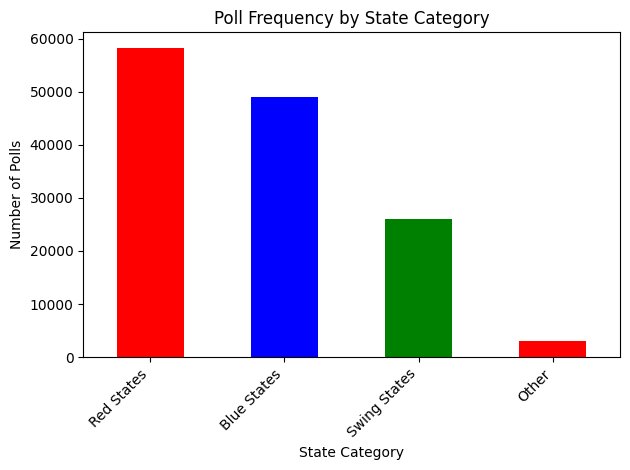

In [29]:
# Categorize states into Swing, Blue, Red, or Other based on predefined lists
def categorize_state(state):
    if state in swing_states:
        return 'Swing States'
    elif state in blue_states:
        return 'Blue States'
    elif state in red_states:
        return 'Red States'
    else:
        return 'Other'

# Apply categorization to the dataset
poll_data['category'] = poll_data['state'].apply(categorize_state)

# Count the frequency of polls by state category
category_counts = poll_data['category'].value_counts()

# Plot the distribution of polls by state category
category_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Poll Frequency by State Category')
plt.xlabel('State Category')
plt.ylabel('Number of Polls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 📋 Preparing Election Results Datan
- Filter and clean election results for cycles from 2004 onwards.
- Ensure numeric consistency for vote shares.

- **Structure**:
  - `X_train`: Polling data from cycles (2004 to YYYY-4) for states (X1...X50)
  - `X_test`: Results (voteshare) for the current cycle (YYYY) for states (X1...X50)

In [34]:
# Load and clean the election results dataset
results = pd.read_csv('dataset/election_results.csv', sep=';')

# Drop irrelevant columns from the results dataset
results = results.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

# Replace commas with dots in the 'vote_share' column for proper numeric conversion
results["vote_share"] = results["vote_share"].str.replace(",", ".")

# Filter results to include only election cycles from 2004 and onwards
results = results[results['cycle'] >= 2004]

# Display the filtered election results dataset
results

,cycle,state,party,candidate,vote_share
0,2012,Alabama,DEM,Barack Obama,38.3590331
1,2012,Alaska,DEM,Barack Obama,40.81265911
2,2012,Arizona,DEM,Barack Obama,44.58976694
3,2012,Arkansas,DEM,Barack Obama,36.8789903
4,2012,California,DEM,Barack Obama,60.23895914
...,...,...,...,...,...
505,2004,Virginia,REP,George W. Bush,53.68236353
506,2004,Washington,REP,George W. Bush,45.64028199
507,2004,West Virginia,REP,George W. Bush,56.06367089
508,2004,Wisconsin,REP,George W. Bush,49.31987146


## 🔗 Merging Polling Data with Election Results
- Combine polling averages and election results into a unified dataset.


In [35]:
# Check unique parties in the election results dataset before merging
set(results['party'])

{'DEM', 'REP'}

In [36]:
# Check unique parties in the polling dataset before merging
set(poll_data['party'])

{'DEM', 'IND', 'LIB', 'REP'}

### Filtering Polling Data for Major Parties
- Since only DEM and REP are represented in the results, filter out LIB and IND from `poll_data` to focus on impactful parties.


In [37]:
# Filter out rows in poll_data with unmatched parties
valid_parties = set(results['party'])  # Only keep parties present in the results dataset
poll_data = poll_data[poll_data['party'].isin(valid_parties)]

# Display the filtered polling dataset
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election,category
7,Arizona,2024,2024-11-04,Kamala Harris,45.900000,DEM,2024-11-05,1,Swing States
8,Arizona,2024,2024-11-04,Donald Trump,51.000000,REP,2024-11-05,1,Swing States
11,Arizona,2024,2024-11-04,Kamala Harris,46.500000,DEM,2024-11-05,1,Swing States
12,Arizona,2024,2024-11-04,Donald Trump,51.600000,REP,2024-11-05,1,Swing States
13,Georgia,2024,2024-11-04,Kamala Harris,48.200000,DEM,2024-11-05,1,Swing States
...,...,...,...,...,...,...,...,...,...
144411,Vermont,2004,2004-11-02,John Kerry,49.357665,DEM,2004-11-02,0,Blue States
144412,Virginia,2004,2004-11-02,John Kerry,43.916727,DEM,2004-11-02,0,Blue States
144413,Washington,2004,2004-11-02,John Kerry,51.681792,DEM,2004-11-02,0,Blue States
144414,West Virginia,2004,2004-11-02,John Kerry,44.495975,DEM,2004-11-02,0,Red States


In [39]:
# Confirm unique parties in the filtered polling dataset
set(poll_data['party'])

{'DEM', 'REP'}

In [40]:
# Check unique candidates in the election results dataset
set(results['candidate'])

{'Barack Obama',
 'Donald Trump',
 'George W. Bush',
 'Hillary Rodham Clinton',
 'John Kerry',
 'John McCain',
 'Joseph R. Biden Jr.',
 'Mitt Romney'}

In [41]:
# Check unique candidate names in the polling dataset
set(poll_data['candidate_name'])

{'Barack Obama',
 'Bernie Sanders',
 'Chris Christie',
 'Chris Sununu',
 'Convention Bounce for Donald Trump',
 'Convention Bounce for Joseph R. Biden Jr.',
 'Donald Trump',
 'Elizabeth Ann Warren',
 'Gavin Newsom',
 'George W. Bush',
 'Glenn Youngkin',
 'Gretchen Whitmer',
 'Hillary Rodham Clinton',
 'J.B. Pritzker',
 'Joe Biden',
 'Joe Manchin, III',
 'John Kerry',
 'John McCain',
 'Joseph R. Biden Jr.',
 'Josh Shapiro',
 'Kamala Harris',
 'Liz Cheney',
 'Mark Kelly',
 'Mike Pence',
 'Mitt Romney',
 'Nikki Haley',
 'Pete Buttigieg',
 'Raphael Warnock',
 'Ron DeSantis',
 'Roy A. Cooper',
 'Tim Scott',
 'Vivek G. Ramaswamy'}

In [42]:
# Filter polling data to analyze convention bounces specifically
poll_data_cb = poll_data[
    (poll_data['candidate_name'] == 'Convention Bounce for Donald Trump') |
    (poll_data['candidate_name'] == 'Convention Bounce for Joseph R. Biden Jr.')
]

# Display the filtered convention bounce data
poll_data_cb

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election,category
18207,Wyoming,2020,2020-11-03,Convention Bounce for Joseph R. Biden Jr.,39.50453,DEM,2020-11-03,0,Red States
18208,Wisconsin,2020,2020-11-03,Convention Bounce for Joseph R. Biden Jr.,40.40954,DEM,2020-11-03,0,Swing States
18209,West Virginia,2020,2020-11-03,Convention Bounce for Joseph R. Biden Jr.,40.02978,DEM,2020-11-03,0,Red States
18210,Washington,2020,2020-11-03,Convention Bounce for Joseph R. Biden Jr.,39.86575,DEM,2020-11-03,0,Blue States
18211,Virginia,2020,2020-11-03,Convention Bounce for Joseph R. Biden Jr.,39.97652,DEM,2020-11-03,0,Blue States
...,...,...,...,...,...,...,...,...,...
33645,California,2020,2020-08-19,Convention Bounce for Joseph R. Biden Jr.,39.99749,DEM,2020-11-03,76,Blue States
33646,Arkansas,2020,2020-08-19,Convention Bounce for Joseph R. Biden Jr.,39.99792,DEM,2020-11-03,76,Red States
33647,Arizona,2020,2020-08-19,Convention Bounce for Joseph R. Biden Jr.,40.08159,DEM,2020-11-03,76,Swing States
33648,Alaska,2020,2020-08-19,Convention Bounce for Joseph R. Biden Jr.,39.44104,DEM,2020-11-03,76,Red States


In [45]:
# Simplify candidate names by removing "Convention Bounce for" prefix
poll_data.loc[:, 'candidate_name'] = poll_data['candidate_name'].apply(
    lambda x: 'Donald Trump' if 'Donald Trump' in x else
              'Joseph R. Biden' if 'Joseph R. Biden' in x else
              x
)

# Display the updated polling dataset after simplifying candidate names
poll_data

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election,category
7,Arizona,2024,2024-11-04,Kamala Harris,45.900000,DEM,2024-11-05,1,Swing States
8,Arizona,2024,2024-11-04,Donald Trump,51.000000,REP,2024-11-05,1,Swing States
11,Arizona,2024,2024-11-04,Kamala Harris,46.500000,DEM,2024-11-05,1,Swing States
12,Arizona,2024,2024-11-04,Donald Trump,51.600000,REP,2024-11-05,1,Swing States
13,Georgia,2024,2024-11-04,Kamala Harris,48.200000,DEM,2024-11-05,1,Swing States
...,...,...,...,...,...,...,...,...,...
144411,Vermont,2004,2004-11-02,John Kerry,49.357665,DEM,2004-11-02,0,Blue States
144412,Virginia,2004,2004-11-02,John Kerry,43.916727,DEM,2004-11-02,0,Blue States
144413,Washington,2004,2004-11-02,John Kerry,51.681792,DEM,2004-11-02,0,Blue States
144414,West Virginia,2004,2004-11-02,John Kerry,44.495975,DEM,2004-11-02,0,Red States


In [46]:
# Check unique candidate names in the updated polling dataset
set(poll_data['candidate_name'])

{'Barack Obama',
 'Bernie Sanders',
 'Chris Christie',
 'Chris Sununu',
 'Donald Trump',
 'Elizabeth Ann Warren',
 'Gavin Newsom',
 'George W. Bush',
 'Glenn Youngkin',
 'Gretchen Whitmer',
 'Hillary Rodham Clinton',
 'J.B. Pritzker',
 'Joe Biden',
 'Joe Manchin, III',
 'John Kerry',
 'John McCain',
 'Joseph R. Biden',
 'Josh Shapiro',
 'Kamala Harris',
 'Liz Cheney',
 'Mark Kelly',
 'Mike Pence',
 'Mitt Romney',
 'Nikki Haley',
 'Pete Buttigieg',
 'Raphael Warnock',
 'Ron DeSantis',
 'Roy A. Cooper',
 'Tim Scott',
 'Vivek G. Ramaswamy'}

In [47]:
# Merge polling data with election results
# Using an inner join ensures only candidates present in both datasets are included
merged_data = pd.merge(
    poll_data,
    results,
    left_on=["cycle", "state", "party", "candidate_name"],
    right_on=["cycle", "state", "party", "candidate"],
    how="inner"
)

# Display the merged dataset containing both polling data and election results
merged_data

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share
0,Wyoming,2020,2020-11-03,Donald Trump,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.93622749
1,Wisconsin,2020,2020-11-03,Donald Trump,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.82243732
2,West Virginia,2020,2020-11-03,Donald Trump,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.62472963
3,Washington,2020,2020-11-03,Donald Trump,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.76697774
4,Virginia,2020,2020-11-03,Donald Trump,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.99550367
...,...,...,...,...,...,...,...,...,...,...,...
99472,Vermont,2004,2004-11-02,John Kerry,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.93746258
99473,Virginia,2004,2004-11-02,John Kerry,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.4838985
99474,Washington,2004,2004-11-02,John Kerry,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.82114831
99475,West Virginia,2004,2004-11-02,John Kerry,44.495975,DEM,2004-11-02,0,Red States,John Kerry,43.19971107


In [50]:
# Convert the 'vote_share' column to numeric format for analysis
merged_data['vote_share'] = pd.to_numeric(merged_data['vote_share'])

# Check the data types of columns in the merged dataset
merged_data.dtypes

,0
state,object
cycle,int64
modeldate,datetime64[ns]
candidate_name,object
pct_estimate,float64
party,object
election_date,datetime64[ns]
days_until_election,int64
category,object
candidate,object


## 💾 Saving Data for Feature Engineering
- Save the merged data to CSV for the next stage of feature engineering.


In [53]:
# Save the cleaned and merged dataset to a more descriptive CSV file
merged_data.to_csv("output/polling_data_cleaned_and_merged.csv", index=False)

## 🔮 Preparing 2024 Data for Model Prediction
- Prepare the 2024 data to be used for model prediction in future steps.

In [55]:
# Filter the polling data for the 2024 cycle and create a copy
poll_data_2024 = poll_data[poll_data['cycle'] == 2024].copy()

# Display the filtered polling data for the 2024 cycle
poll_data_2024

,state,cycle,modeldate,candidate_name,pct_estimate,party,election_date,days_until_election,category
7,Arizona,2024,2024-11-04,Kamala Harris,45.9,DEM,2024-11-05,1,Swing States
8,Arizona,2024,2024-11-04,Donald Trump,51.0,REP,2024-11-05,1,Swing States
11,Arizona,2024,2024-11-04,Kamala Harris,46.5,DEM,2024-11-05,1,Swing States
12,Arizona,2024,2024-11-04,Donald Trump,51.6,REP,2024-11-05,1,Swing States
13,Georgia,2024,2024-11-04,Kamala Harris,48.2,DEM,2024-11-05,1,Swing States
...,...,...,...,...,...,...,...,...,...
18060,Arizona,2024,2021-06-23,Donald Trump,44.0,REP,2024-11-05,1231,Swing States
18077,New Hampshire,2024,2021-05-10,Joe Biden,51.0,DEM,2024-11-05,1275,Blue States
18078,New Hampshire,2024,2021-05-10,Donald Trump,43.0,REP,2024-11-05,1275,Blue States
18083,Missouri,2024,2021-04-22,Joe Biden,38.0,DEM,2024-11-05,1293,Red States


In [56]:
# Save the filtered 2024 polling data to a more descriptive CSV file
poll_data_2024.to_csv("output/polling_data_2024_cleaned_and_merged.csv", index=False)